# US Visa Prediction Project

**Life cycle of a Data Science Project**

* Understanding the Project Statement
* Data Collection
* Exploratory Data Analysis
* Data Cleaning 
* Data Pre-Processing
* Feature Engineering
* Model Training
* Choosing the best model


# 1) Problem Statement

Based on the data available predict if person will be approved for visa or not.
This is classification probelm and the model developed will be used to classify a person into visa approved or not based on the individual features

# 2) Data Collection

The dataset is part of Office of Labor Certification (OFLC)
Datset link: [text](https://www.kaggle.com/datasets/moro23/easyvisa-dataset)

**2.1) Import required packages**

In [12]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

**Import dataset as pandas DataFrame**

In [14]:
df = pd.read_csv(r"D:\US_Visa_MLOPS\dataset\EasyVisa.csv")

**Show top 5 rows**

In [15]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Shape of the dataset**

In [17]:
df.shape

(25480, 12)

**Summary of the dataset**

In [18]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Columns (Features) information**

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# 3) Exploring Data

In [41]:
#extract numerical and categorical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_fatures = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features: {}".format(len(numerical_features), numerical_features))
print("\nWe have {} categorical features: {}".format(len(categorical_fatures), categorical_fatures))

We have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [25]:
#proportion of count data on categorical columns
for col in categorical_fatures:
    print(df[col].value_counts(normalize=True) * 100)
    print("--------------------------------")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
--------------------------------
region_of_

**Insights**
* case_id has unique values in each row which can be dropped as it has no importance
* continent is more inclined towards asia
* unit_of_wage seems to be an important feature as most of them are yeary contracts

**Univariate Analysis**
* The purpose of univariate Analysis is to understand the distribution of a single variable

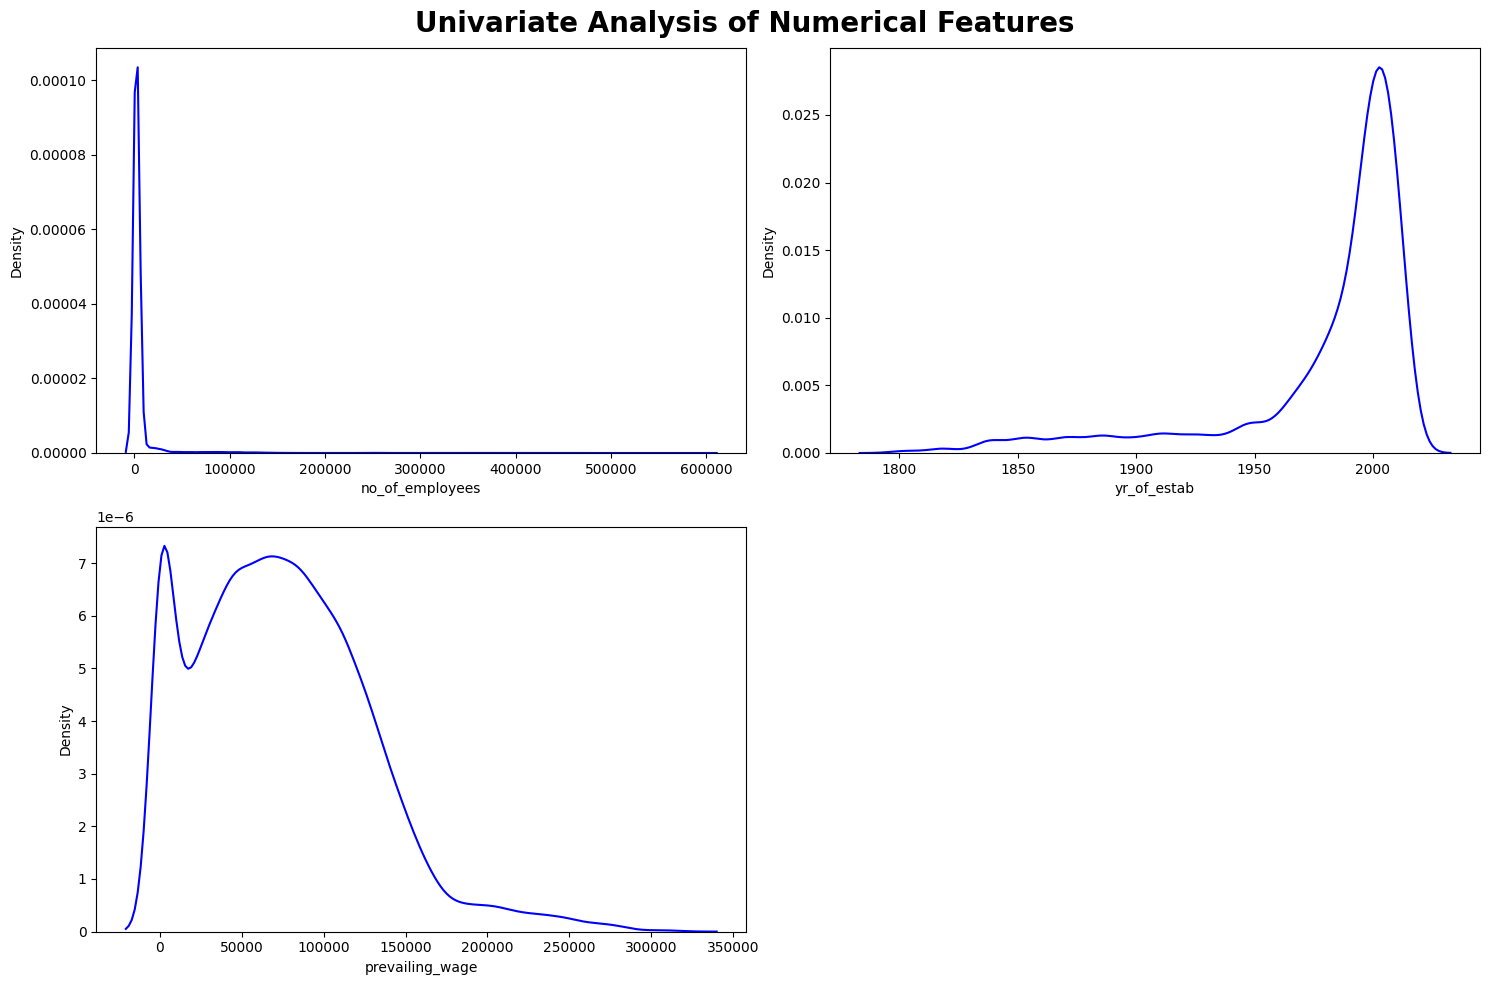

In [36]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight='bold')

for i in range(len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numerical_features[i]], color = 'blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()


**Insighs**
* no_of_employees column is left skewed which may be because of outliers
* yr_of_estab is right skewed and is a discrete fearture
* privailing_wage looks fine

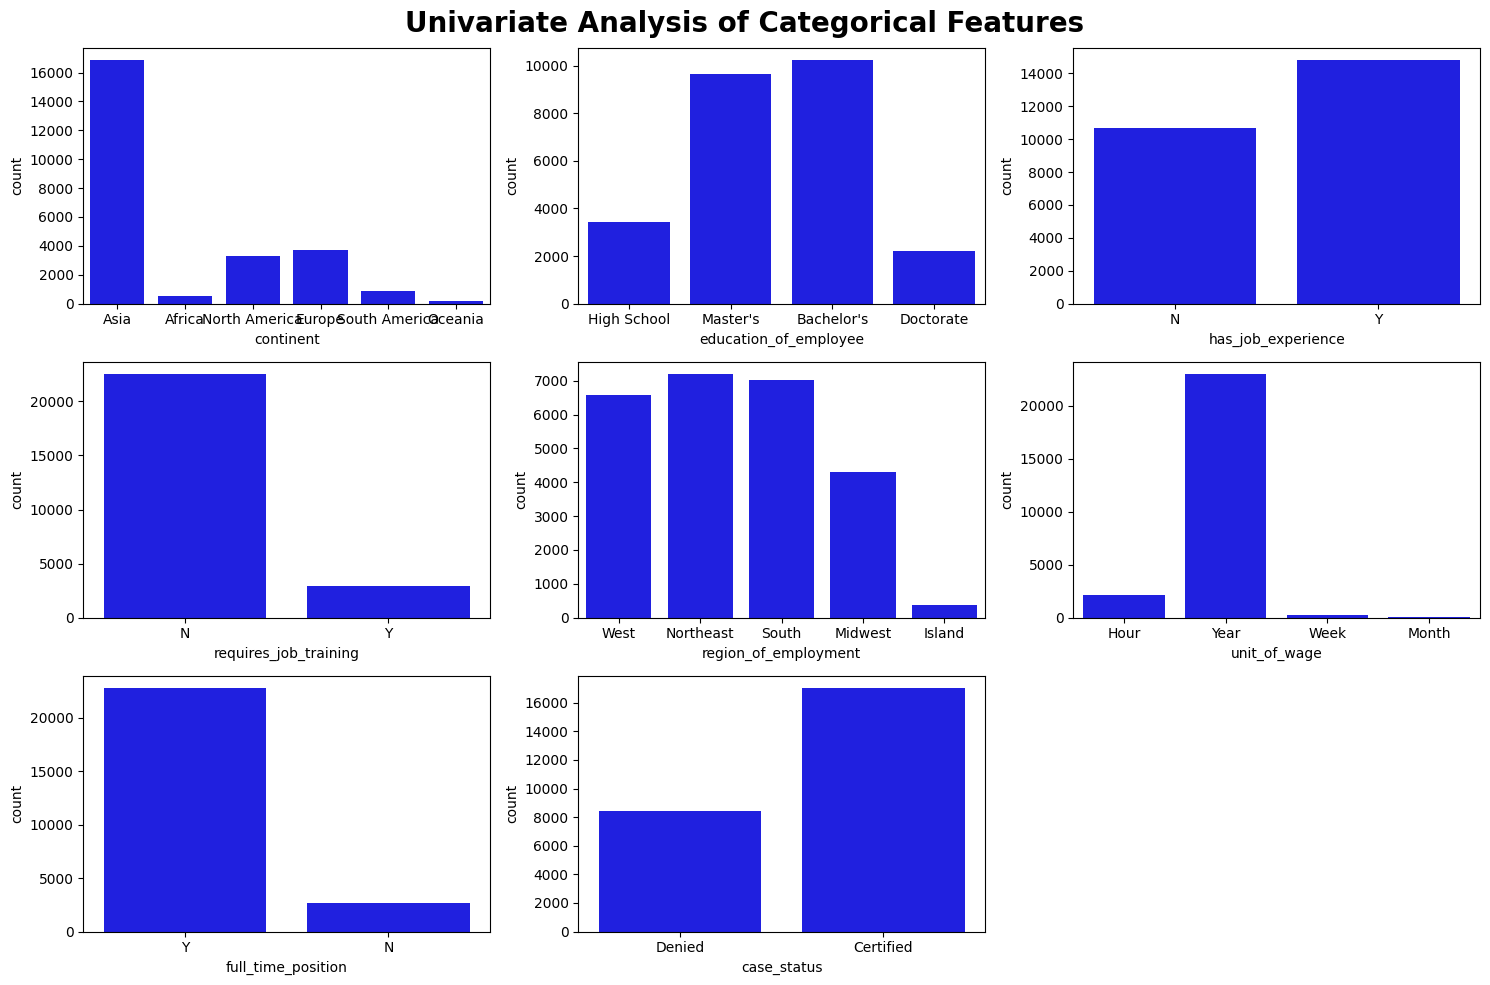

In [ ]:
categorical_fatures.remove('case_id')

plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight='bold')

for i in range(len(categorical_fatures)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_fatures[i]])
    plt.xlabel(categorical_fatures[i])
    plt.tight_layout()

**Insights**
* requires_job_training, unit_of_wage, full_time_position and continents columns have single category dominating
* Rest of the columns look balanced

**Multivariate Analysis**

In [45]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]
continous_features = [feature for feature in numerical_features if len(df[feature].unique()) > 25]

print("We have {} dicrete features: {}".format(len(discrete_features), discrete_features))
print("We have {} continous features: {}".format(len(continous_features), continous_features))

We have 0 dicrete features: []
We have 3 continous features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


**Check Multicollinearity in Categorical Features**
* There is no multicolinearity in numerical features
* Chi-square test can be used to find the relationship between two categorical features
* Here we test the correlation of Categorical features with the Target Feature which is case_status
* Null Hypothesis (H0): The target variable is independent from the input feature (no correlation)
* Alternate Hypothesis: The target variable and input feature are not independent (Correlated)

In [50]:
df['case_status'].to_list()

['Denied',
 'Certified',
 'Denied',
 'Denied',
 'Certified',
 'Certified',
 'Certified',
 'Denied',
 'Certified',
 'Certified',
 'Certified',
 'Denied',
 'Certified',
 'Certified',
 'Certified',
 'Denied',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Denied',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Denied',
 'Denied',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Denied',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Denied',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Certified',
 'Denied',
 'Certified',
 'Denied',
 'Certified',
 'Denied',
 'Certified',
 'Denied',
 'Certified',
 'Certified',
 'Certified',
 'Denied',
 'Certified',
 'Denied',
 'Certified',
 'Certified',
 

In [57]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_fatures:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")

result = pd.DataFrame(data=[categorical_fatures, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


**Report**
* Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column

**Checking null values**

In [58]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

# 4) Visualization


**Visualizing the target vriable**

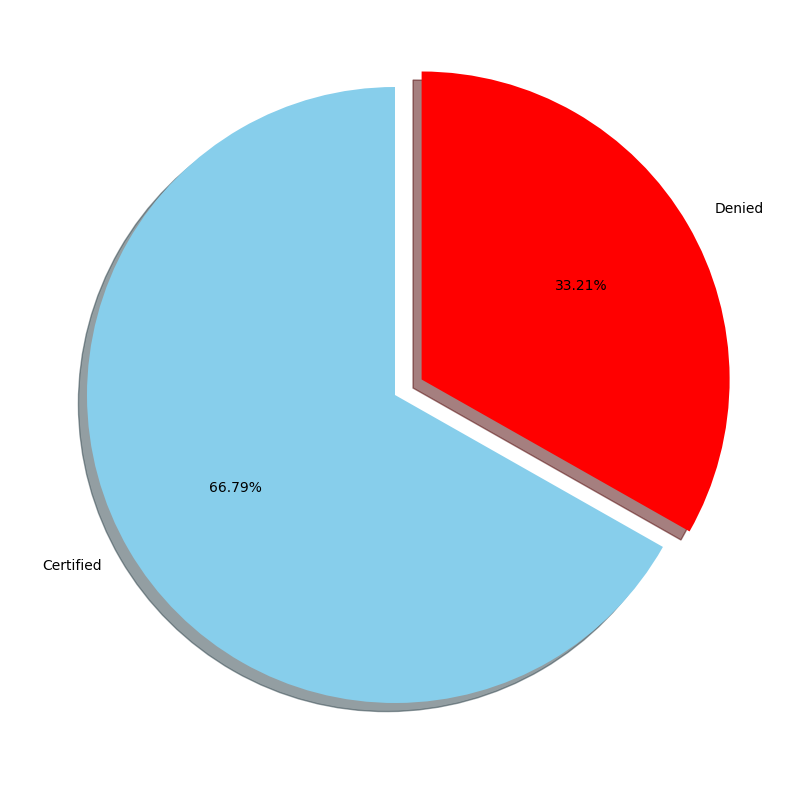

In [84]:
percentage = df.case_status.value_counts(normalize=True) * 100
labels = ['Certified','Denied']

fig, ax = plt.subplots(figsize=(15,10))
ax.pie(percentage, labels=labels, startangle=90, shadow=True, explode= (0,0.1), autopct='%1.2f%%', colors=['skyblue','red'])
plt.show()


* From the chart we can see that the dataset is imbalanced i.e Here Denied value has more count than the Certified value of the dataset.

**Does applicant's previous work experience has any impact on Visa status?**

In [89]:
#Group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

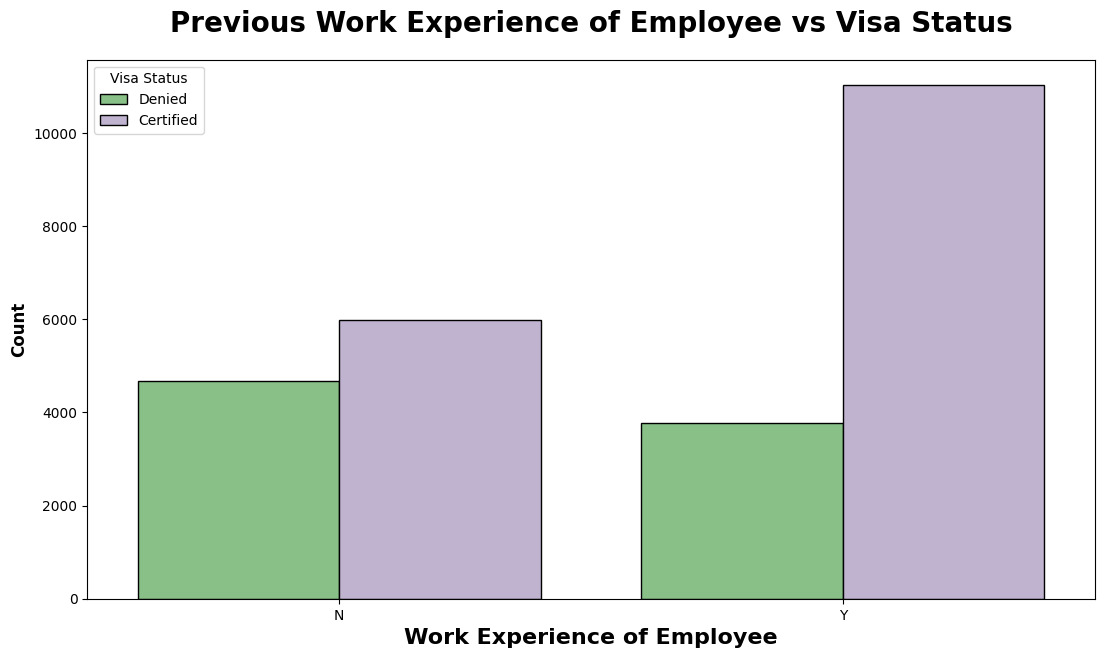

In [93]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

**Like above we can visualize how each input feature has impact on the target feature**

# Final Report
* case_id column can be dropped as it is an ID with unique values in each row and has no impact
* There are no missing values in the dataset
* requires_job_training column can be dropped as it does not have much impact and is not correlated with the targe variable
* no_of_employees, yr_of_estab columns are skewed should be handled.
* target column case_status is imbalanced which needs to be balanced before model building